<a href="https://colab.research.google.com/github/HaydeePeruyero/CAMDA2023/blob/main/resultados/Camda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1

In [1]:
!pip install contextily
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 16.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
os.chdir('/content/drive/MyDrive/CAMDA')
!pwd

/content/drive/MyDrive/CAMDA


In [3]:
import contextily as ctx
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
otus = pd.read_csv("/content/metadata_camda23.csv", index_col="ID")
otus.head()

,ID_city,City,Year,Latitude,Longitude,Climate
ID,,,,,,
CAMDA23_MetaSUB_gCSD16_AKL_10,AKL,Auckland,16,-36.75,174.75,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_11,AKL,Auckland,16,-36.75,174.75,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_12,AKL,Auckland,16,-36.75,174.75,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_13,AKL,Auckland,16,-36.75,174.75,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_14,AKL,Auckland,16,-36.75,174.75,Cfb


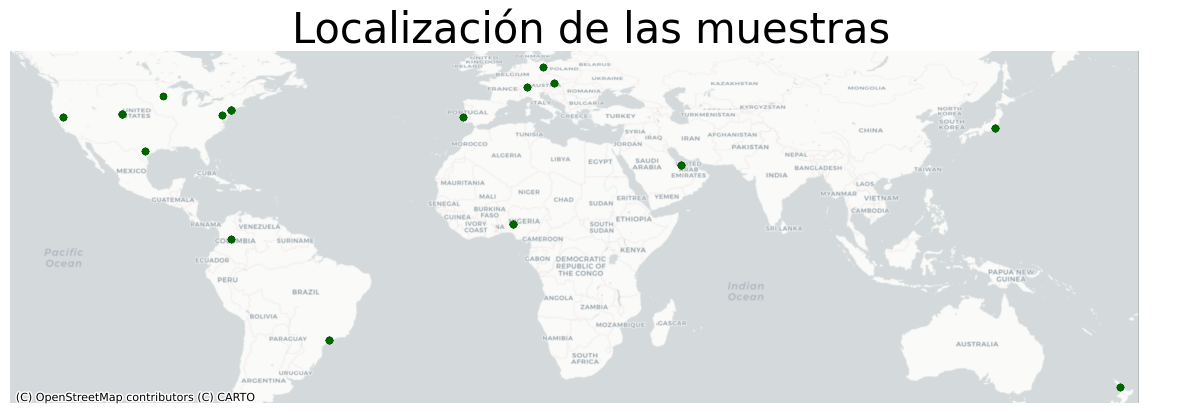

In [6]:
otus_gdf = gpd.GeoDataFrame(otus.copy(), geometry=gpd.points_from_xy(otus['Longitude'], otus['Latitude']), crs='EPSG:4326')

fig, ax = plt.subplots(1, figsize=(15, 15))
otus_gdf.plot(marker='.', c='darkgreen', ax=ax, markersize=70, zorder=1)
plt.title("Localización de las muestras",fontsize=30)
plt.axis("off")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

In [ ]:
cont_names = list(otus.drop(["ID_city","City","Climate","Latitude", "Longitude","Year"], axis=1).columns)
y_names = ["Climate"]
train_df = otus[cont_names+y_names]
train_df

,468,469,28090,2708348,2853158,2725684,2563897,1879049,2773709,2079596,...,1519389,12480,1131,2886895,546184,12330,1922682,1513254,1922952,Climate
ID,,,,,,,,,,,,,,,,,,,,,
CAMDA23_MetaSUB_gCSD16_AKL_10,0.048249,10.696605,14.560432,1.407184,0.881451,0.459366,0.092738,0.084259,0.049634,0.043755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_11,0.038155,0.527739,0.041985,0.006187,0.004125,0.001817,0.037517,0.043557,0.017383,0.002701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_12,0.002185,0.234138,0.051282,0.004188,0.001881,0.001335,0.001578,0.004188,0.000971,0.000668,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_13,0.000142,0.014304,0.010763,0.001360,0.000510,0.000227,0.000340,0.000283,0.000340,0.000028,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_14,0.002103,0.061997,0.079509,0.003771,0.000653,0.001704,0.000544,0.000725,0.000109,0.000036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,0.005680,0.120175,0.057822,0.004221,0.000714,0.002452,0.002111,0.001148,0.000776,0.000310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_6,0.004338,0.293497,0.147385,0.007505,0.000930,0.007092,0.001653,0.001825,0.000930,0.000654,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_7,0.004828,0.345558,0.146226,0.007608,0.001244,0.004535,0.001609,0.001463,0.000585,0.001097,...,0.000073,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb


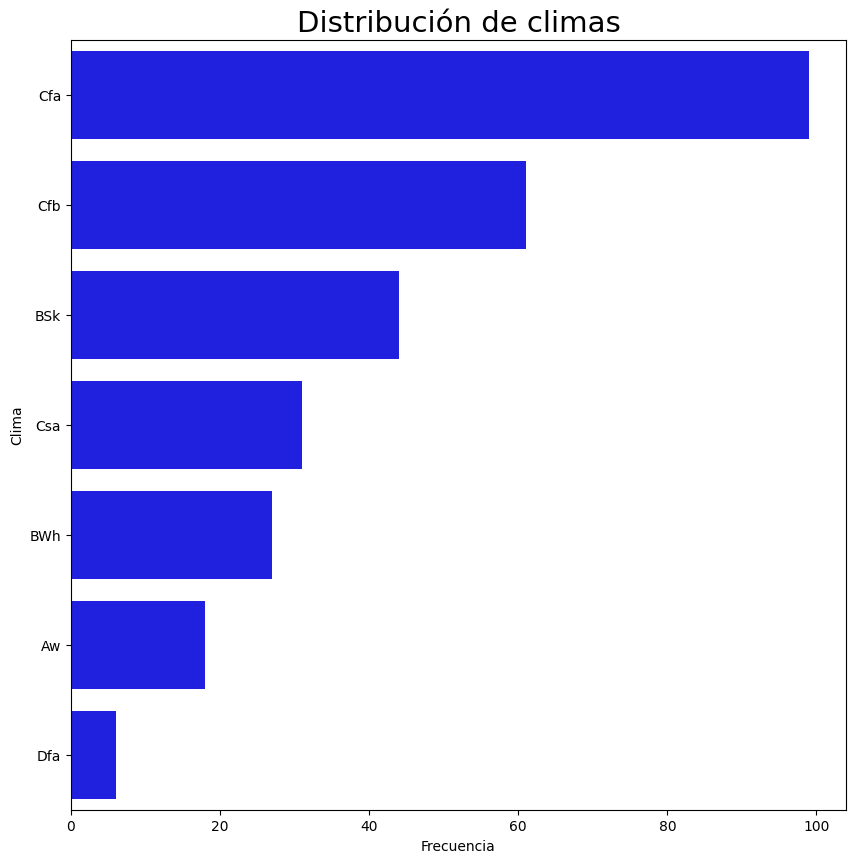

In [ ]:
fig, ax = plt.subplots(1,1 ,figsize=(10, 10))
sns.countplot(data=train_df, y="Climate", order=train_df.Climate.value_counts().index, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Distribución de climas", fontsize=21)
plt.show()

In [ ]:
y = np.array(train_df[y_names]).ravel()
X = np.array(train_df.drop(y_names,axis=1)).astype('float')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

X_std = StandardScaler().fit_transform(X)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_std) 
proj = pd.DataFrame(otus_pca.transform(X_std),columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y})

# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50)
#X_tsne = tsne.fit_transform(train_img)
#tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'digit': y_train})
X_tsne = tsne.fit_transform(X_std)

tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'clima': y})

In [ ]:
# Grafica interactiva
fig = px.scatter(tsne_dataset, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()


# Notebook 2

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

otus = pd.read_csv("camda_relative.csv", index_col="ID")

cont_names = list(otus.drop(["ID_city","City","Climate","Latitude", "Longitude", "Year"], axis=1).columns)
y_names = ["Climate"]
otus_df = otus[cont_names+y_names]
otus_df

,468,469,28090,2708348,2853158,2725684,2563897,1879049,2773709,2079596,...,1519389,12480,1131,2886895,546184,12330,1922682,1513254,1922952,Climate
ID,,,,,,,,,,,,,,,,,,,,,
CAMDA23_MetaSUB_gCSD16_AKL_10,0.048249,10.696605,14.560432,1.407184,0.881451,0.459366,0.092738,0.084259,0.049634,0.043755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_11,0.038155,0.527739,0.041985,0.006187,0.004125,0.001817,0.037517,0.043557,0.017383,0.002701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_12,0.002185,0.234138,0.051282,0.004188,0.001881,0.001335,0.001578,0.004188,0.000971,0.000668,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_13,0.000142,0.014304,0.010763,0.001360,0.000510,0.000227,0.000340,0.000283,0.000340,0.000028,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_14,0.002103,0.061997,0.079509,0.003771,0.000653,0.001704,0.000544,0.000725,0.000109,0.000036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,0.005680,0.120175,0.057822,0.004221,0.000714,0.002452,0.002111,0.001148,0.000776,0.000310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_6,0.004338,0.293497,0.147385,0.007505,0.000930,0.007092,0.001653,0.001825,0.000930,0.000654,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_7,0.004828,0.345558,0.146226,0.007608,0.001244,0.004535,0.001609,0.001463,0.000585,0.001097,...,0.000073,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb


El problema de clasificación es complejo: tiene muchas categorías y está muy desbalanceado...

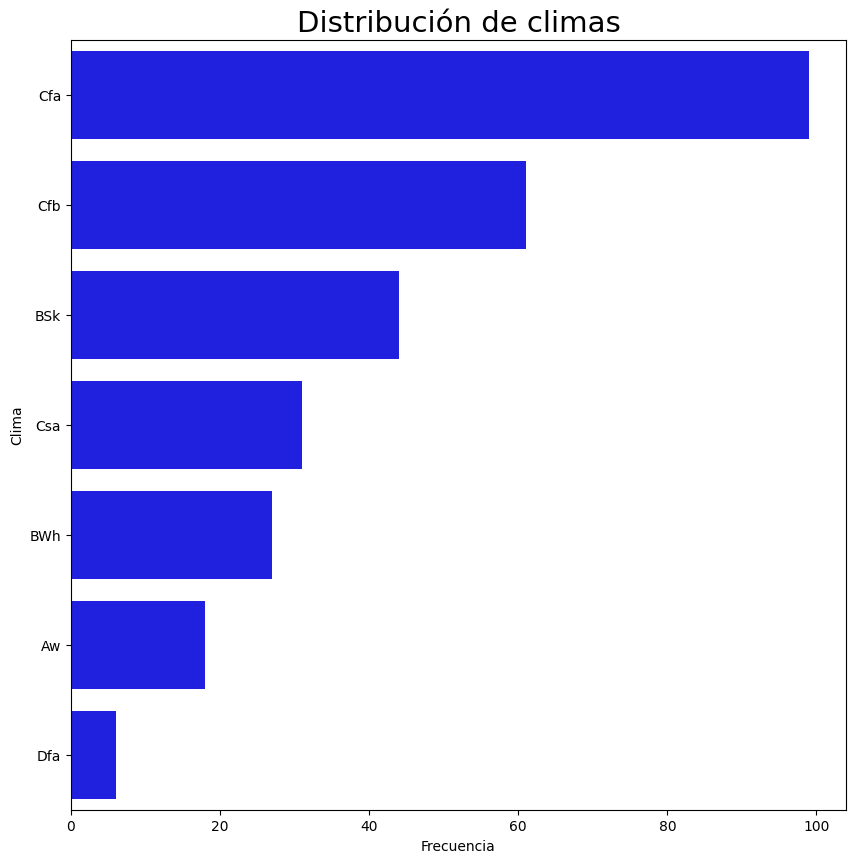

In [ ]:
fig, ax = plt.subplots(1,1 ,figsize=(10, 10))
sns.countplot(data=otus_df, y="Climate", order=otus_df.Climate.value_counts().index, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Distribución de climas", fontsize=21)
plt.show()

Para fines didácticos, restrinjo los datos a aquellos que tienen al menos `n_min` datos en su categoría:

In [ ]:
def get_reduced_data(data,y_counts,ylab='Climate',n_min=5):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

In [ ]:
y_counts = otus_df.Climate.value_counts()
y_counts

Cfa    99
Cfb    61
BSk    44
Csa    31
BWh    27
Aw     18
Dfa     6
Name: Climate, dtype: int64

In [ ]:
n_min = 5
otus_val_df, y_val = get_reduced_data(otus_df,y_counts,'Climate',n_min)
otus_val_df.shape

(286, 18290)

In [ ]:
y_val.index

Index(['Cfa', 'Cfb', 'BSk', 'Csa', 'BWh', 'Aw', 'Dfa'], dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline
#plt.style.use('seaborn') 

Creo las variables dependientes e independientes. Para las variables dependientes, uso una codificación numérica de la respuesta con `LabelEncoder`

In [ ]:
y = np.array(otus_val_df[y_names]).ravel()
X = np.array(otus_val_df.drop(y_names,axis=1)).astype('float')

le = preprocessing.LabelEncoder()
le.fit(y)
#le.classes_
y_cat = le.transform(y)
#le.inverse_transform(y_cat[:5])

Creamos conjunto de datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=0)

In [ ]:
logreg = LogisticRegression(solver='sag')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



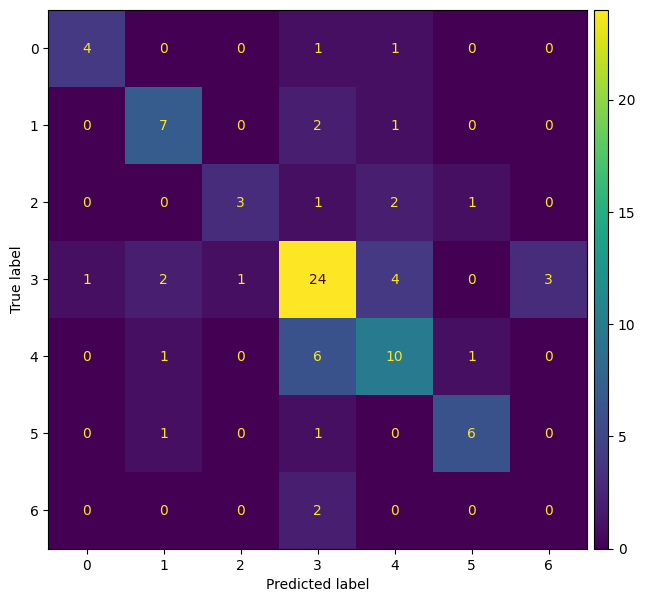

In [ ]:
plt.style.use('default') 
cm = metrics.confusion_matrix(y_test,y_pred)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.64      0.70      0.67        10
           2       0.75      0.43      0.55         7
           3       0.65      0.69      0.67        35
           4       0.56      0.56      0.56        18
           5       0.75      0.75      0.75         8
           6       0.00      0.00      0.00         2

    accuracy                           0.63        86
   macro avg       0.59      0.54      0.56        86
weighted avg       0.64      0.63      0.63        86



### Representación PCA

Ahora, veamos los resultados usando una versión simplificada de los datos con PCA.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_train_std)
X_train_pca = otus_pca.transform(X_train_std)
proj = pd.DataFrame(X_train_pca,columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y_train})

In [ ]:
# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(autosize=False,width=800,height=800,)
fig.show()

In [ ]:
X_test_std = scaler.fit_transform(X_test)
X_test_pca = otus_pca.transform(X_test_std)

In [ ]:
logreg2 = LogisticRegression(solver='newton-cg')
logreg2.fit(X_train_pca, y_train)

y_pred2 = logreg2.predict(X_test_pca)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_pca, y_test)))

Accuracy of logistic regression classifier on test set: 0.47


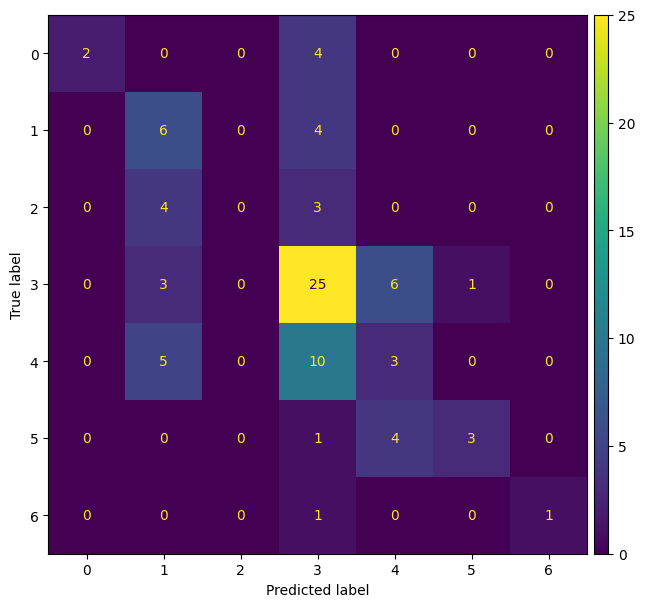

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred2)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [ ]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.33      0.60      0.43        10
           2       0.00      0.00      0.00         7
           3       0.52      0.71      0.60        35
           4       0.23      0.17      0.19        18
           5       0.75      0.38      0.50         8
           6       1.00      0.50      0.67         2

    accuracy                           0.47        86
   macro avg       0.55      0.38      0.41        86
weighted avg       0.46      0.47      0.43        86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Notebook 3

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

otus = pd.read_csv("camda_relative.csv", index_col="ID")

cont_names = list(otus.drop(["ID_city","City","Climate","Latitude", "Longitude", "Year"], axis=1).columns)
y_names = ["Climate"]
otus_df = otus[cont_names+y_names]
otus_df

,468,469,28090,2708348,2853158,2725684,2563897,1879049,2773709,2079596,...,1519389,12480,1131,2886895,546184,12330,1922682,1513254,1922952,Climate
ID,,,,,,,,,,,,,,,,,,,,,
CAMDA23_MetaSUB_gCSD16_AKL_10,0.048249,10.696605,14.560432,1.407184,0.881451,0.459366,0.092738,0.084259,0.049634,0.043755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_11,0.038155,0.527739,0.041985,0.006187,0.004125,0.001817,0.037517,0.043557,0.017383,0.002701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_12,0.002185,0.234138,0.051282,0.004188,0.001881,0.001335,0.001578,0.004188,0.000971,0.000668,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_13,0.000142,0.014304,0.010763,0.001360,0.000510,0.000227,0.000340,0.000283,0.000340,0.000028,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD16_AKL_14,0.002103,0.061997,0.079509,0.003771,0.000653,0.001704,0.000544,0.000725,0.000109,0.000036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,0.005680,0.120175,0.057822,0.004221,0.000714,0.002452,0.002111,0.001148,0.000776,0.000310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_6,0.004338,0.293497,0.147385,0.007505,0.000930,0.007092,0.001653,0.001825,0.000930,0.000654,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_7,0.004828,0.345558,0.146226,0.007608,0.001244,0.004535,0.001609,0.001463,0.000585,0.001097,...,0.000073,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb


In [ ]:
def get_reduced_data(data,y_counts,ylab='Climate',n_min=5):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

In [ ]:
y_counts = otus_df.Climate.value_counts()
#y_counts

In [ ]:
n_min = 5
otus_val_df, y_val = get_reduced_data(otus_df,y_counts,'Climate',n_min)
otus_val_df.shape

(286, 18290)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#plt.style.use('seaborn') 

yy = np.array(otus_val_df[y_names]).ravel()
X_numpy = np.array(otus_val_df.drop(y_names,axis=1)).astype('float')

scaler = StandardScaler()
X_numpy = scaler.fit_transform(X_numpy)

le = preprocessing.LabelEncoder()
le.fit(yy)
#le.classes_
y_numpy = le.transform(yy)
#le.inverse_transform(y_cat[:5])

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X_numpy).type(torch.float)
y = torch.from_numpy(y_numpy).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [ ]:
class nnet_otus(nn.Module):
    def __init__(self, input_features, output_features):
        super(nnet_otus, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=520), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=520, out_features=520), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=520, out_features=300), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=300, out_features=100), 
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=output_features), 
        )

    def forward(self, x):
        return self.seq(x)


In [ ]:
# Set the hyperparameters for data creation
NUM_CLASSES = len(le.classes_)
NUM_FEATURES = X_train.shape[1]

# Create an instance of the model and send it to target device
model = nnet_otus(NUM_FEATURES, NUM_CLASSES).to(device)

# Setup loss and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) 

# Fit the model
torch.manual_seed(42)
epochs = 100

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model(X_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_score(y_train.detach().cpu().numpy(), y_pred.detach().cpu().numpy()) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_score(y_test.detach().cpu().numpy(), test_pred.detach().cpu().numpy())

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.94756, Accuracy: 0.20% | Test loss: 1.93202, Test acc: 0.23%
Epoch: 10 | Loss: 1.78925, Accuracy: 0.36% | Test loss: 1.81721, Test acc: 0.30%
Epoch: 20 | Loss: 1.46282, Accuracy: 0.37% | Test loss: 1.61085, Test acc: 0.34%
Epoch: 30 | Loss: 0.97845, Accuracy: 0.67% | Test loss: 1.36265, Test acc: 0.45%
Epoch: 40 | Loss: 0.55276, Accuracy: 0.81% | Test loss: 1.19447, Test acc: 0.52%
Epoch: 50 | Loss: 0.25988, Accuracy: 0.95% | Test loss: 1.05713, Test acc: 0.58%
Epoch: 60 | Loss: 0.10989, Accuracy: 0.97% | Test loss: 1.02184, Test acc: 0.65%
Epoch: 70 | Loss: 0.06399, Accuracy: 0.99% | Test loss: 0.99878, Test acc: 0.65%
Epoch: 80 | Loss: 0.03418, Accuracy: 0.99% | Test loss: 1.06298, Test acc: 0.65%
Epoch: 90 | Loss: 0.02415, Accuracy: 1.00% | Test loss: 1.02347, Test acc: 0.65%


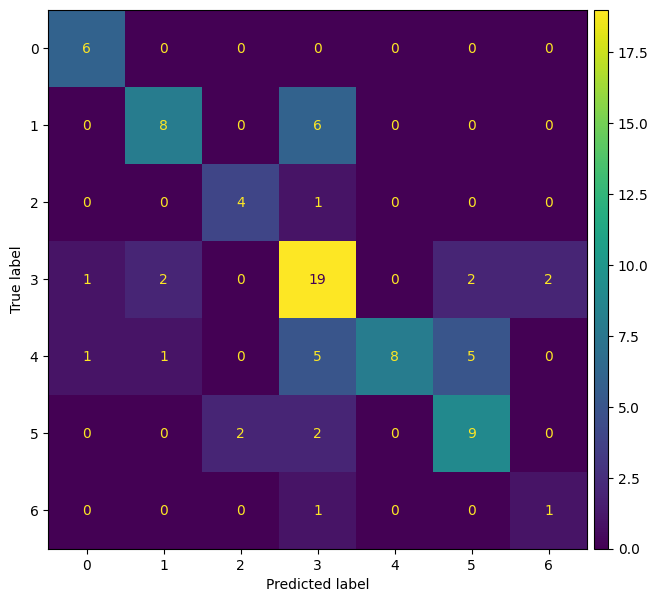

In [ ]:
model.eval()
with torch.no_grad():
  test_logits = model(X_test)
  y_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

plt.style.use('default') 
cm = metrics.confusion_matrix(y_test.detach().cpu().numpy(), y_pred.detach().cpu().numpy())
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [ ]:
print(metrics.classification_report(y_test.detach().cpu().numpy(), y_pred.detach().cpu().numpy()))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.73      0.57      0.64        14
           2       0.67      0.80      0.73         5
           3       0.56      0.73      0.63        26
           4       1.00      0.40      0.57        20
           5       0.56      0.69      0.62        13
           6       0.33      0.50      0.40         2

    accuracy                           0.64        86
   macro avg       0.66      0.67      0.64        86
weighted avg       0.70      0.64      0.63        86



# Notebook 4

# Modelos de predicción con Pytorch

In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=9349ec5ab293d94b01b2dbad0a2d42c98a35ad7cc286d44b5a020df93f7edbb8
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# Notebook 5

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

otus = pd.read_csv("camda_relative.csv", index_col="ID")

cont_names = list(otus.drop(["ID_city","City","Climate","Latitude", "Longitude", "Year"], axis=1).columns)
y_names = ["Climate"]
otus_df = otus[cont_names+y_names]

In [ ]:
def get_reduced_data(data,y_counts,ylab='Climate',n_min=5):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

In [ ]:
y_counts = otus_df.Climate.value_counts()
y_counts

Cfa    99
Cfb    61
BSk    44
Csa    31
BWh    27
Aw     18
Dfa     6
Name: Climate, dtype: int64

In [ ]:
n_min = 5
otus_val_df, y_val = get_reduced_data(otus_df,y_counts,'Climate',n_min)
otus_val_df.shape

(286, 18290)

## Batch samples and data loaders

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data.dataset import random_split
%matplotlib inline
#plt.style.use('seaborn') 

yy = np.array(otus_val_df[y_names]).ravel()
X_numpy = np.array(otus_val_df.drop(y_names,axis=1)).astype('float')

le = preprocessing.LabelEncoder()
le.fit(yy)
#le.classes_
y_numpy = le.transform(yy)
#le.inverse_transform(y_cat[:5])

In [ ]:
def split_stratified_into_train_val_test(X, y, frac_train=0.6, frac_val=0.15, frac_test=0.25,
                                         random_state=None):
    '''
    Splits a dataset into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in y (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    X : numpy dataframe of covariates
    y : numpy array of responses
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    '''
    
    if round(frac_train + frac_val + frac_test,10) != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    # Split original dataframe into temp and test dataframes.
    #x_train, x_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state)
    x_temp, x_test, y_temp, y_test = train_test_split(X, y, stratify=y, test_size=(1.0 - (frac_train+frac_val)), random_state=random_state)
    # standardize train_val (temp) and test data
    scaler = StandardScaler()
    x_temp = scaler.fit_transform(x_temp)
    x_test = scaler.transform(x_test)

    # Split the temp dataframe into val and test dataframes.
    #relative_frac_test = frac_test / (frac_val + frac_test)
    #x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, stratify=y_temp, test_size=relative_frac_test, random_state=random_state)
    relative_frac_val = frac_val / (frac_train + frac_val)
    x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, stratify=y_temp, test_size=relative_frac_val, random_state=random_state)

    #assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return x_train, y_train, x_val, y_val, x_test, y_test, scaler

In [ ]:
# create train (70%), validation (20%) and test (10%) datasets
X_tr, y_tr, X_val, y_val, X_te, y_te, __ = split_stratified_into_train_val_test(X_numpy, y_numpy, .60, .20, .20)

In [ ]:
print(X_tr.shape,X_val.shape,X_te.shape)

(171, 18289) (57, 18289) (58, 18289)


In [ ]:
print(y_tr.shape,y_val.shape,y_te.shape)

(171,) (57,) (58,)


In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Turn data into tensors
X_train = torch.from_numpy(X_tr).type(torch.float)
y_train = torch.from_numpy(y_tr).type(torch.LongTensor)
X_val = torch.from_numpy(X_val).type(torch.float)
y_val = torch.from_numpy(y_val).type(torch.LongTensor)
X_test = torch.from_numpy(X_te).type(torch.float)
y_test = torch.from_numpy(y_te).type(torch.LongTensor)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_val, y_val = X_val.to(device), y_val.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [ ]:
class nnet_otus(nn.Module):
    def __init__(self, input_features, output_features):
        super(nnet_otus, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=520), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=520, out_features=520), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=520, out_features=300), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=300, out_features=100), 
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=output_features), 
        )

    def forward(self, x):
        return self.seq(x)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)

batch_size = 32
# Builds a loader for each dataset to perform mini-batch gradient descent
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False)

In [ ]:
# Set the hyperparameters for data creation
NUM_CLASSES = len(le.classes_)
NUM_FEATURES = X_train.shape[1]

# Create an instance of the model and send it to target device
model = nnet_otus(NUM_FEATURES, NUM_CLASSES).to(device)

# Setup loss and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=0) 

# Fit the model
torch.manual_seed(42)
epochs = 100

# Build training and evaluation loop
for epoch in range(epochs):  
    ### Training
    model.train()
    for x_batch, y_batch in train_loader:
      
      # 1. Forward pass (model outputs raw logits)
      y_logits = model(x_batch) # model outputs raw logits 
      y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

      # 2. Calculate loss/accuracy
      loss = loss_fn(y_logits, y_batch) 
      acc = accuracy_score(y_batch.detach().cpu().numpy(), y_pred.detach().cpu().numpy()) 

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # Uses loader to fetch one mini-batch for validation
      for x_batch, y_batch in val_loader:
          # 1. Forward pass
          test_logits = model(x_batch)
          test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
          # 2. Caculate loss/accuracy
          test_loss = loss_fn(test_logits, y_batch)
          test_acc = accuracy_score(y_batch.detach().cpu().numpy(), test_pred.detach().cpu().numpy())

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation loss: {test_loss:.5f}, Validation acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.94403, Accuracy: 0.00% | Validation loss: 1.89862, Validation acc: 0.20%
Epoch: 10 | Loss: 0.01522, Accuracy: 1.00% | Validation loss: 0.81819, Validation acc: 0.80%
Epoch: 20 | Loss: 0.00066, Accuracy: 1.00% | Validation loss: 0.82615, Validation acc: 0.80%
Epoch: 30 | Loss: 0.00016, Accuracy: 1.00% | Validation loss: 0.87457, Validation acc: 0.80%
Epoch: 40 | Loss: 0.00037, Accuracy: 1.00% | Validation loss: 0.86143, Validation acc: 0.80%
Epoch: 50 | Loss: 0.00004, Accuracy: 1.00% | Validation loss: 0.85812, Validation acc: 0.80%
Epoch: 60 | Loss: 0.00002, Accuracy: 1.00% | Validation loss: 0.88705, Validation acc: 0.80%
Epoch: 70 | Loss: 0.00006, Accuracy: 1.00% | Validation loss: 0.86214, Validation acc: 0.80%
Epoch: 80 | Loss: 0.00012, Accuracy: 1.00% | Validation loss: 0.89216, Validation acc: 0.80%
Epoch: 90 | Loss: 0.00008, Accuracy: 1.00% | Validation loss: 0.94806, Validation acc: 0.80%


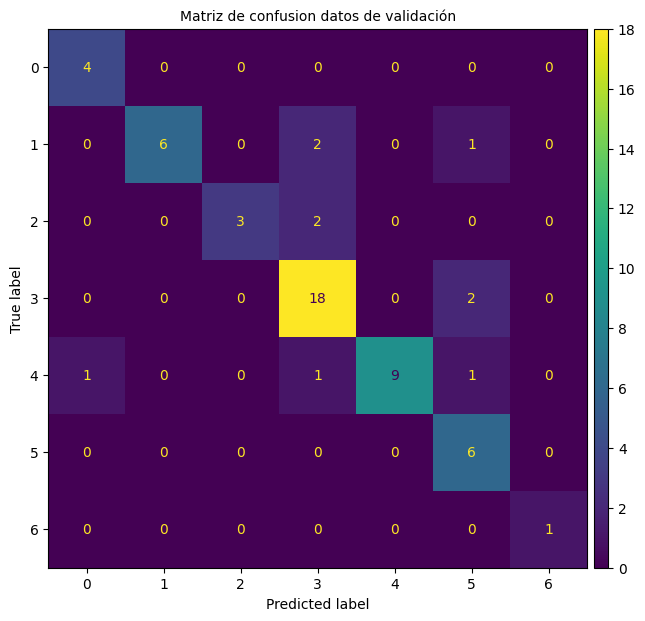

In [ ]:
model.eval()
with torch.no_grad():
  val_logits = model(X_val)
  y_pred = torch.softmax(val_logits, dim=1).argmax(dim=1)

plt.style.use('default') 
cm = metrics.confusion_matrix(y_val.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), normalize=None)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Matriz de confusion datos de validación',{'fontsize':10})

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [ ]:
print(metrics.classification_report(y_val.detach().cpu().numpy(), y_pred.detach().cpu().numpy()))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         9
           2       1.00      0.60      0.75         5
           3       0.78      0.90      0.84        20
           4       1.00      0.75      0.86        12
           5       0.60      1.00      0.75         6
           6       1.00      1.00      1.00         1

    accuracy                           0.82        57
   macro avg       0.88      0.85      0.84        57
weighted avg       0.87      0.82      0.83        57



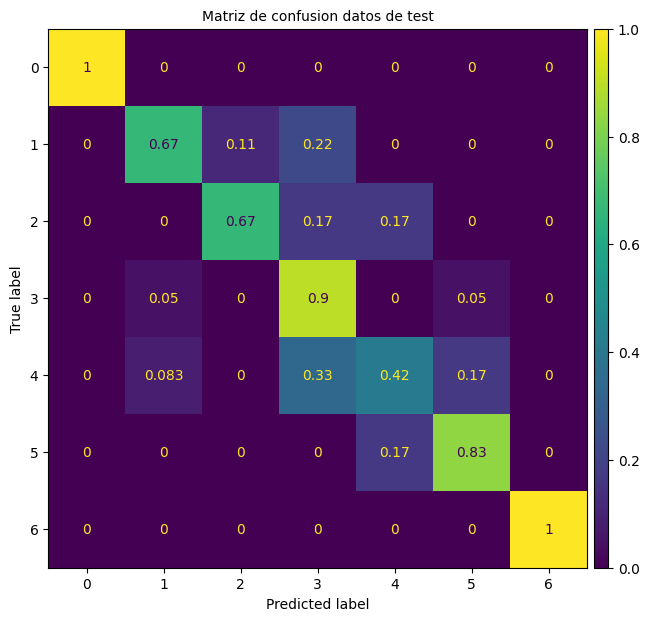

In [ ]:
model.eval()
with torch.no_grad():
  val_logits = model(X_test)
  y_pred = torch.softmax(val_logits, dim=1).argmax(dim=1)

plt.style.use('default') 
cm = metrics.confusion_matrix(y_test.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), normalize='true')
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Matriz de confusion datos de test',{'fontsize':10})

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [ ]:
print(metrics.classification_report(y_test.detach().cpu().numpy(), y_pred.detach().cpu().numpy()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.75      0.67      0.71         9
           2       0.80      0.67      0.73         6
           3       0.72      0.90      0.80        20
           4       0.71      0.42      0.53        12
           5       0.62      0.83      0.71         6
           6       1.00      1.00      1.00         1

    accuracy                           0.74        58
   macro avg       0.80      0.78      0.78        58
weighted avg       0.75      0.74      0.73        58



## Neural networks as feature extractor

In [ ]:
global view_output
def hook_fn(module, input, output):
    global view_output
    view_output = output
net = nnet_otus(NUM_FEATURES, NUM_CLASSES).to(device)
hook = net.seq[-2].register_forward_hook(hook_fn)

with torch.no_grad():
  val_logits = net(X_train)


In [ ]:
view_output.shape

torch.Size([1967, 100])

In [ ]:
hook.remove()